# Student Success Prediction
**Group Assignment | Final Report**

This notebook summarizes the full machine learning pipeline used to predict student success using regression.

## Step 1: Exploratory Data Analysis (EDA)

### Summary Statistics

,age,previous_gpa,attendance_rate,participation_score,assignment_completion,study_hours_per_week,digital_literacy,previous_course_failures,extracurricular_hours,work_hours_per_week,distance_from_campus,final_grade
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,19.814000,2.714360,0.717600,6.910200,71.350400,5.808600,6.903600,0.270000,3.071200,9.212000,6.364600,97.500000
std,2.522723,0.667223,0.149643,1.854679,15.501443,3.340207,1.886899,0.511491,2.426897,10.579173,4.272953,4.368084
min,17.000000,0.810000,0.280000,1.700000,29.000000,0.700000,1.600000,0.000000,0.000000,0.000000,0.200000,71.000000
25%,17.000000,2.287500,0.620000,5.600000,60.475000,3.500000,5.600000,0.000000,1.100000,0.000000,3.300000,96.000000
50%,20.000000,2.720000,0.740000,6.900000,72.800000,5.200000,6.900000,0.000000,2.500000,5.000000,5.550000,100.000000
75%,21.000000,3.160000,0.830000,8.300000,83.725000,7.700000,8.400000,0.000000,4.225000,17.000000,8.300000,100.000000
max,31.000000,4.000000,0.990000,10.000000,99.500000,21.800000,10.000000,2.000000,13.000000,48.000000,24.400000,100.000000


### Skewness of Numerical Features

,Skew,Suitable for Linear,Suitable for Tree-Based
final_grade,-2.293989,False,True
previous_course_failures,1.735323,False,True
study_hours_per_week,1.210231,False,True
distance_from_campus,1.158623,False,True
extracurricular_hours,1.133014,False,True
work_hours_per_week,0.910221,True,False
age,0.822904,True,False
attendance_rate,-0.565259,True,False
assignment_completion,-0.404533,True,False
digital_literacy,-0.219542,True,False


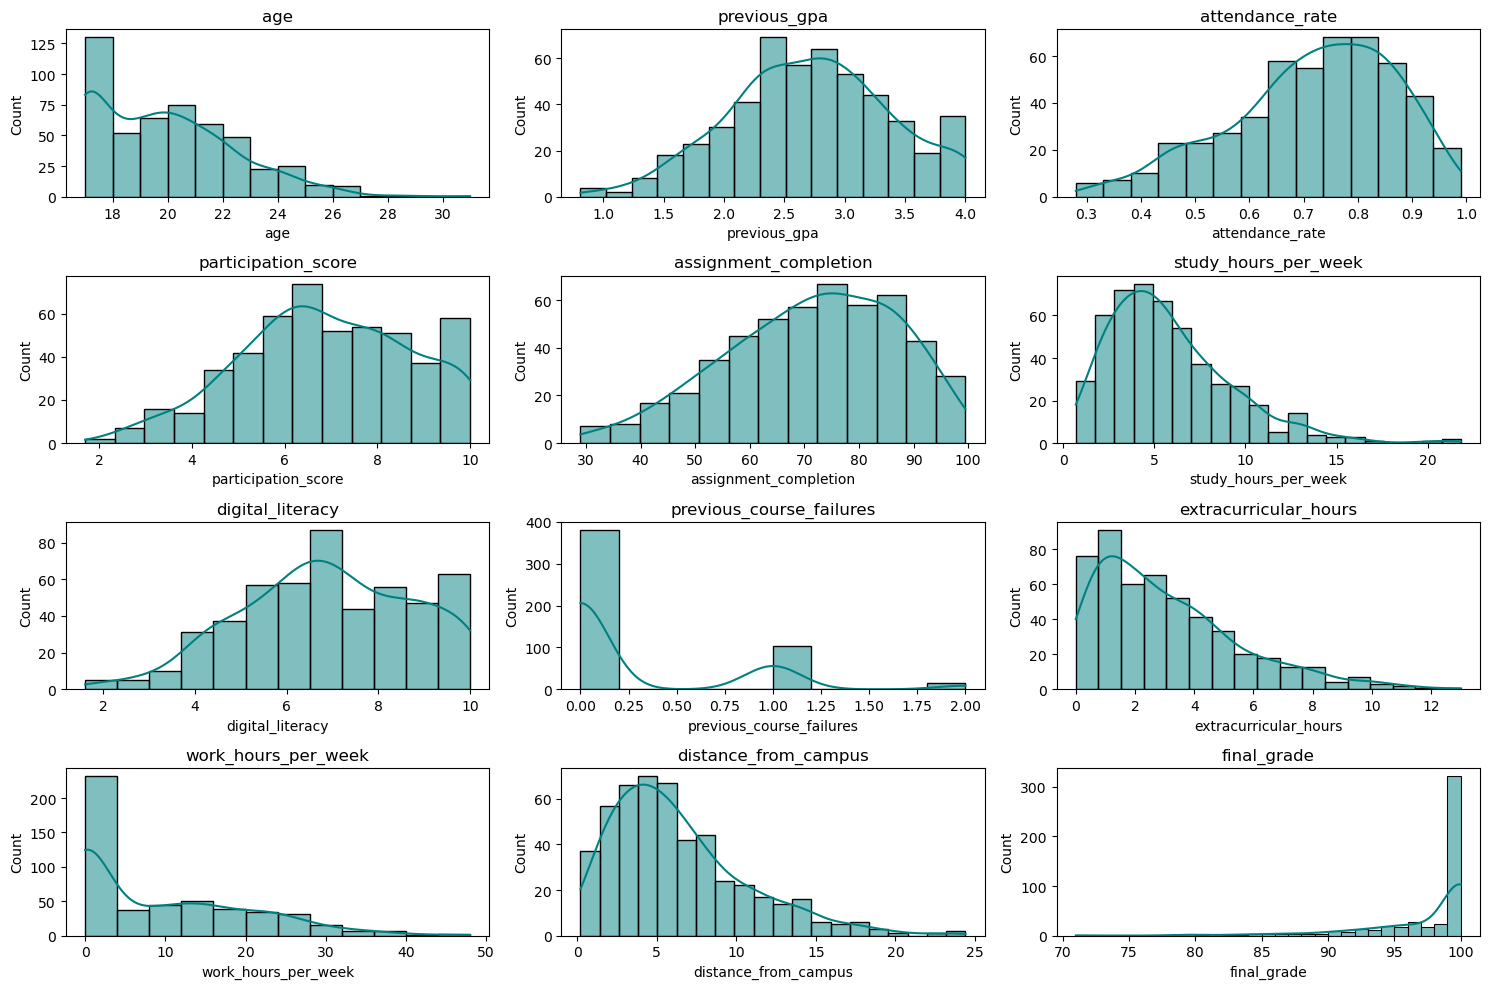

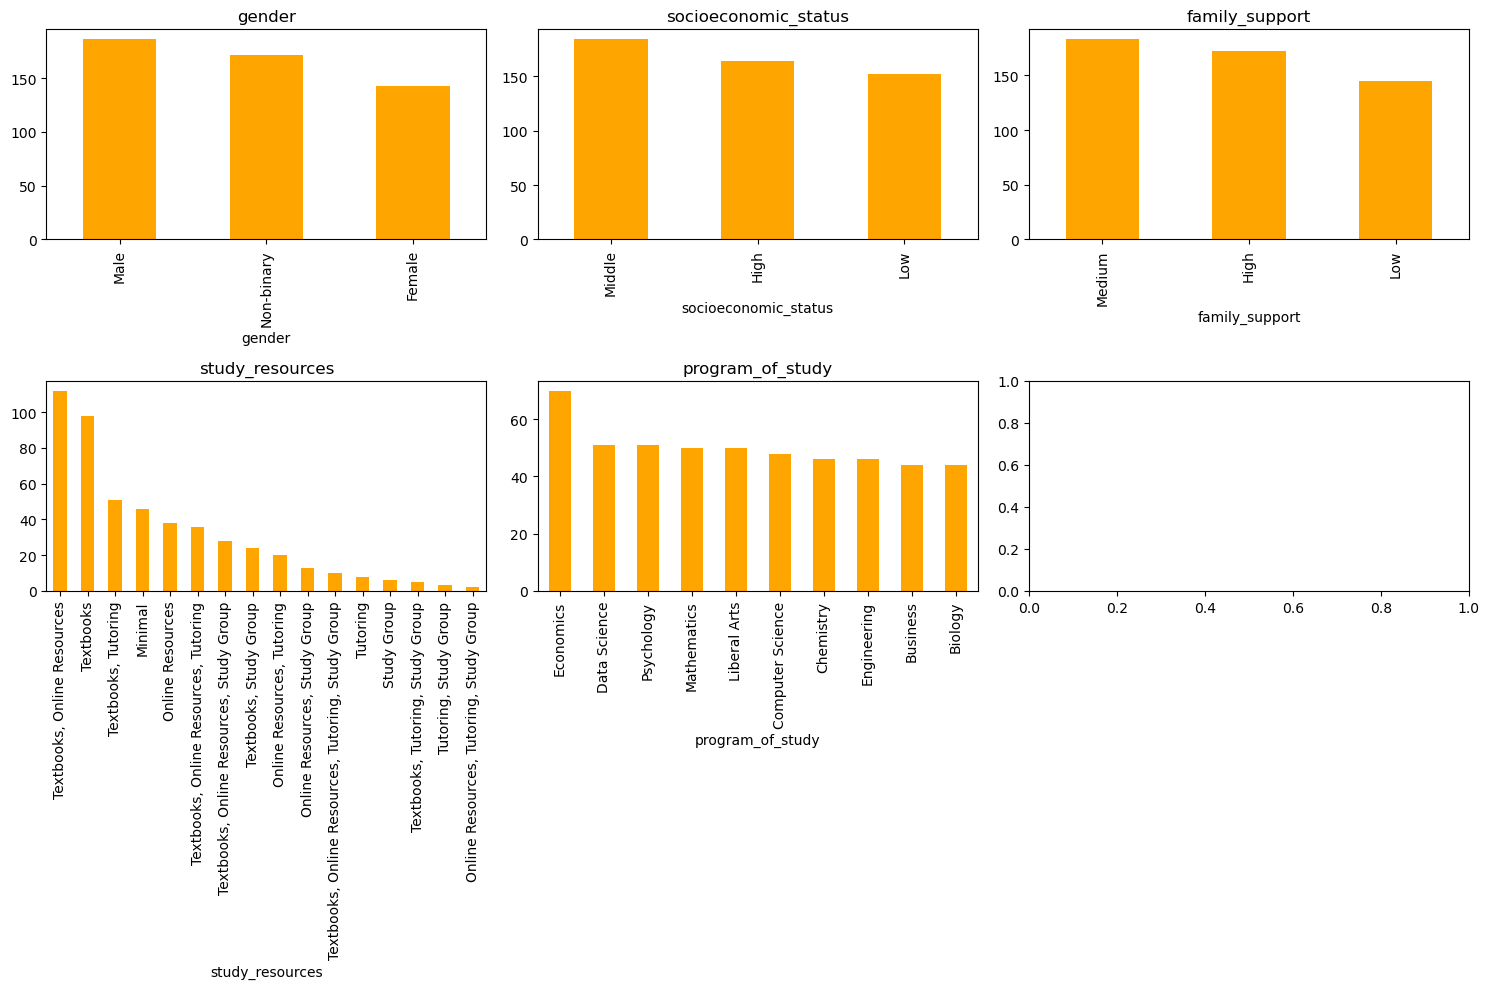

## Step 2: Data Preprocessing for Regression

### No columns dropped due to missingness.

### Imputation Applied

- Numerical: filled with median<br>- Categorical: filled with mode

### Ordinal Encoding Applied

,0,1,2
socioeconomic_status,Low,Middle,High
family_support,Low,Medium,High


### One-Hot Encoding Applied

['gender',
 'study_resources',
 'first_generation_student',
 'program_of_study',
 'completed_course']

### Standardized Numerical Features (Z-score)

['age',
 'previous_gpa',
 'attendance_rate',
 'participation_score',
 'assignment_completion',
 'study_hours_per_week',
 'digital_literacy',
 'previous_course_failures',
 'extracurricular_hours',
 'work_hours_per_week',
 'distance_from_campus']

### ✅ Preprocessing Complete — Data Ready for Modeling

## Step 3: Feature Engineering & Selection

### 3.1. Top 15 Features by Correlation with `final_grade`

attendance_rate                                            0.354536
previous_gpa                                               0.316125
previous_course_failures                                   0.285680
participation_score                                        0.262517
family_support                                             0.257603
assignment_completion                                      0.170208
work_hours_per_week                                        0.138253
study_hours_per_week                                       0.119064
program_of_study_Mathematics                               0.097776
program_of_study_Chemistry                                 0.091974
study_resources_Online Resources, Tutoring, Study Group    0.065352
first_generation_student_True                              0.055461
study_resources_Textbooks, Tutoring                        0.052246
distance_from_campus                                       0.051017
extracurricular_hours                           

### 3.2. Removed 0 Multicollinear Features (r > 0.85)

### 3.3. Final Features (Intersection of RFE and Lasso)

,Selected Features
0,study_hours_per_week
1,program_of_study_Mathematics
2,"study_resources_Online Resources, Tutoring, St..."
3,participation_score
4,assignment_completion
5,family_support
6,program_of_study_Chemistry
7,previous_gpa
8,previous_course_failures
9,attendance_rate


## Step 4: Model Development & Evaluation

,Model,R²,RMSE,MAE
0,Random Forest,0.528825,3.122700,2.184500
1,LassoRegression,0.494676,3.233881,2.397951
2,RidgeRegression,0.493031,3.239140,2.419480
3,LinearRegression,0.485802,3.262152,2.449734
4,Gradient Boosting,0.475620,3.294291,2.310829
5,Stacking Regressor,0.374702,3.597348,2.118000


## Step 5: Model Interpretation

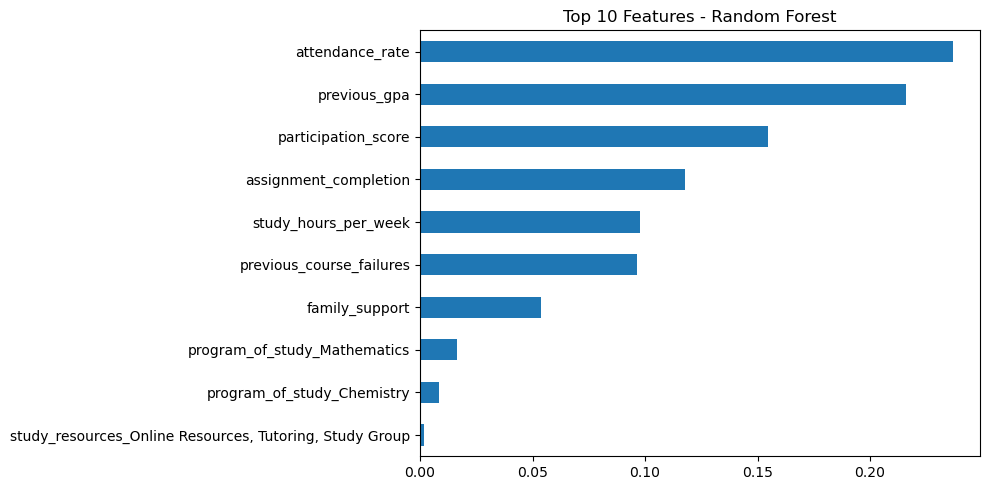

✅ Saved best model (Random Forest) to ../models/best_model.pkl


In [ ]:
# Final Project Notebook: Predicting Student Success

from IPython.display import display, Markdown

# --- HEADER ---
display(Markdown("# Student Success Prediction\n**Group Assignment | Final Report**"))
display(Markdown("This notebook summarizes the full machine learning pipeline used to predict student success using regression."))

# --- STEP 1: EDA ---
display(Markdown("## Step 1: Exploratory Data Analysis (EDA)"))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso

# Load dataset
original_df = pd.read_csv("../data/student_success_dataset.csv")

df = original_df.copy()
# Drop student_id column
df = df.drop(columns='student_id')
# Univariate: Summary stats and distributions
numerical = df.select_dtypes(include='number').columns.tolist()
categorical = df.select_dtypes(include='object').columns.tolist()

# Summary statistics
display(Markdown("### Summary Statistics"))
display(df.describe())

# Skewness table
display(Markdown("### Skewness of Numerical Features"))

skew_data = pd.DataFrame({
    "Skew": df[numerical].skew(),
    "Suitable for Linear": df[numerical].skew().abs() < 1,
    "Suitable for Tree-Based": df[numerical].skew().abs() >= 1
})

display(skew_data.sort_values("Skew", key=np.abs, ascending=False))

# Compact histograms (numerical)
fig, axs = plt.subplots(nrows=(len(numerical)+2)//3, ncols=3, figsize=(15, 10))
axs = axs.flatten()
for i, col in enumerate(numerical):
    sns.histplot(df[col], kde=True, ax=axs[i], color='teal')
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

# Compact bar plots (categorical)
fig, axs = plt.subplots(nrows=(len(categorical)+2)//3, ncols=3, figsize=(15, 10))
axs = axs.flatten()
for i, col in enumerate(categorical):
    df[col].value_counts().plot(kind='bar', ax=axs[i], color='orange')
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

# --- STEP 2: Preprocessing ---
display(Markdown("## Step 2: Data Preprocessing for Regression"))

ordinal_mappings = {
    'socioeconomic_status': ['Low', 'Middle', 'High'],
    'family_support': ['Low', 'Medium', 'High']
}

def preprocess_for_regression(df, target_col, ordinal_mappings, drop_threshold=0.5):
    df = df.copy()
    # display(Markdown("## Step 2: Data Preprocessing for Regression"))

    # Drop columns with excessive missingness
    null_ratios = df.isnull().mean()
    cols_to_drop = null_ratios[null_ratios > drop_threshold].index.tolist()
    df.drop(columns=cols_to_drop, inplace=True)
    if cols_to_drop:
        display(Markdown(f"### Dropped Columns (>{drop_threshold*100:.0f}% missing):"))
        display(cols_to_drop)
    else:
        display(Markdown("### No columns dropped due to missingness."))

    # Identify columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(target_col, errors='ignore')
    categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

    # Impute missing values
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)
    display(Markdown("### Imputation Applied"))
    display(Markdown("- Numerical: filled with median<br>- Categorical: filled with mode"))

    # Ordinal encoding
    if ordinal_mappings:
        for col, order in ordinal_mappings.items():
            dtype = pd.api.types.CategoricalDtype(categories=order, ordered=True)
            df[col] = df[col].astype(dtype).cat.codes
        display(Markdown("### Ordinal Encoding Applied"))
        display(pd.DataFrame.from_dict(ordinal_mappings, orient='index'))


    # One-hot encode remaining categoricals
    onehot_cols = [col for col in categorical_cols if col not in (ordinal_mappings or {})]
    df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)
    if onehot_cols:
        display(Markdown("### One-Hot Encoding Applied"))
        display(onehot_cols)
    else:
        display(Markdown("### No One-Hot Encoding Needed"))

    # Standardize numerical features (excluding target)
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    display(Markdown("### Standardized Numerical Features (Z-score)"))
    display(numerical_cols.tolist())

    display(Markdown("### ✅ Preprocessing Complete — Data Ready for Modeling"))
    return df

cleaned_df = preprocess_for_regression(df, 'final_grade', ordinal_mappings)

# --- STEP 3: Feature Engineering ---
display(Markdown("## Step 3: Feature Engineering & Selection"))

def feature_selection(df, target_col='final_grade', top_n_features=15, correlation_threshold=0.85):
    # display(Markdown("## Step 3: Feature Engineering"))

    # 3.1. Correlation with target
    corr = df.corr()[target_col].drop(target_col).abs().sort_values(ascending=False)
    top_features = corr.head(top_n_features).index.tolist()
    display(Markdown(f"### 3.1. Top {top_n_features} Features by Correlation with `{target_col}`"))
    display(corr.head(top_n_features))

    X = df[top_features]
    y = df[target_col]

    # 3.2. Remove highly correlated (multicollinearity)
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > correlation_threshold)]
    X_filtered = X.drop(columns=to_drop)
    display(Markdown(f"### 3.2. Removed {len(to_drop)} Multicollinear Features (r > {correlation_threshold})"))
    if to_drop:
        display(to_drop)

    # 3.3. Feature selection with RFE
    rfe = RFE(LinearRegression(), n_features_to_select=min(10, X_filtered.shape[1]))
    rfe.fit(X_filtered, y)
    rfe_features = X_filtered.columns[rfe.support_]

    # 3.4. Feature selection with Lasso
    lasso = Lasso(alpha=0.01)
    lasso.fit(X_filtered, y)
    lasso_features = X_filtered.columns[lasso.coef_ != 0]

    # 3.5. Final selected features
    final_features = list(set(rfe_features) & set(lasso_features))
    display(Markdown("### 3.3. Final Features (Intersection of RFE and Lasso)"))
    display(pd.DataFrame(final_features, columns=["Selected Features"]))

    # 3.6. Return reduced dataframe
    return df[final_features + [target_col]]


refined_df = feature_selection(cleaned_df, 'final_grade')

# --- STEP 4: Model Training ---
display(Markdown("## Step 4: Model Development & Evaluation"))

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

X = refined_df.drop(columns='final_grade')
y = refined_df['final_grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'LinearRegression': LinearRegression(),
    'RidgeRegression': Ridge(),
    'LassoRegression': Lasso(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100),
    'Stacking Regressor': StackingRegressor(
        estimators=[('ridge', Ridge()), ('lasso', Lasso(alpha=0.01))],
        final_estimator=RandomForestRegressor(n_estimators=50)
    )
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results.append({
        'Model': name,
        'R²': r2_score(y_test, pred),
        'RMSE': root_mean_squared_error(y_test, pred),
        'MAE': mean_absolute_error(y_test, pred)
    })

results_df = pd.DataFrame(results).sort_values('R²', ascending=False).reset_index(drop=True)
display(results_df)

# --- STEP 5: Interpretation ---
display(Markdown("## Step 5: Model Interpretation"))

best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
best_model.fit(X, y)

if hasattr(best_model, 'feature_importances_'):
    importance = pd.Series(best_model.feature_importances_, index=X.columns)
else:
    importance = pd.Series(best_model.coef_, index=X.columns)

importance = importance.sort_values(key=np.abs, ascending=False).head(10)
importance.plot(kind='barh', title=f"Top 10 Features - {best_model_name}", figsize=(10, 5))
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Ensure the 'docs' directory exists
os.makedirs("../docs", exist_ok=True)

# Markdown report
with open("../docs/step7_feature_importance.md", "w") as f:
    f.write("# Step 7: Feature Importance — Random Forest\n\n")
    f.write("## Top Features Influencing Final Grade\n\n")
    for feat, score in importance.items():
        f.write(f"- **{feat}** has an importance score of **{score:.4f}**\n")
    f.write("\n_These scores reflect how frequently and effectively each feature is used to split decision trees._\n")


# --- STEP 6: Save Model & Docs ---
import joblib
import os
os.makedirs("../models", exist_ok=True)
joblib.dump(best_model, "../models/best_model.pkl")
print(f"✅ Saved best model ({best_model_name}) to ../models/best_model.pkl")

# Save .md docs (assumes generated earlier)
os.makedirs("../docs", exist_ok=True)
# Example: shutil.move("step5_insights.md", "../docs/step5_insights.md")
